# Levenshtein Distance and Word Error Rate (WER) Computation

This notebook demonstrates implementations of the Levenshtein Distance algorithm (Naïve Recursive, Dynamic Programming, and Optimized DP) and its practical use for computing Word Error Rate (WER) in Automatic Speech Recognition (ASR) systems.


In [1]:
def levenshtein_recursive(s1, s2, m, n):
    if m == 0:
        return n
    if n == 0:
        return m
    if s1[m - 1] == s2[n - 1]:
        return levenshtein_recursive(s1, s2, m - 1, n - 1)

    return 1 + min(
        levenshtein_recursive(s1, s2, m, n - 1),
        levenshtein_recursive(s1, s2, m - 1, n),
        levenshtein_recursive(s1, s2, m - 1, n - 1)
    )

# Example Usage
s1, s2 = "kitten", "sitting"
print("Naïve Recursive Levenshtein Distance:", levenshtein_recursive(s1, s2, len(s1), len(s2)))


Naïve Recursive Levenshtein Distance: 3


In [2]:
import numpy as np

def levenshtein_dp(s1, s2):
    m, n = len(s1), len(s2)
    dp = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    return int(dp[m][n])

# Example Usage
s1, s2 = "kitten", "sitting"
print("DP Levenshtein Distance:", levenshtein_dp(s1, s2))


DP Levenshtein Distance: 3


In [3]:
def levenshtein_optimized(s1, s2):
    m, n = len(s1), len(s2)
    if m < n:
        s1, s2 = s2, s1
        m, n = n, m

    previous_row = list(range(n + 1))
    current_row = [0] * (n + 1)

    for i in range(1, m + 1):
        current_row[0] = i
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                current_row[j] = previous_row[j - 1]
            else:
                current_row[j] = 1 + min(previous_row[j], current_row[j - 1], previous_row[j - 1])
        previous_row = current_row[:]

    return previous_row[n]

# Example Usage
s1, s2 = "kitten", "sitting"
print("Optimized DP Levenshtein Distance:", levenshtein_optimized(s1, s2))


Optimized DP Levenshtein Distance: 3


In [4]:
!pip install jiwer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.0 MB/s eta 0:00:00


In [5]:
import jiwer

reference = "The quick brown fox jumps over the lazy dog"

google_transcript = "The quick brown fox jump over the lazy dog"
whisper_transcript = "The quick brown fox jumps over the lazy dog"

wer_google = jiwer.wer(reference, google_transcript)
wer_whisper = jiwer.wer(reference, whisper_transcript)

print(f"Google Speech-to-Text WER: {wer_google:.2%}")
print(f"Whisper AI WER: {wer_whisper:.2%}")


Google Speech-to-Text WER: 11.11%
Whisper AI WER: 0.00%


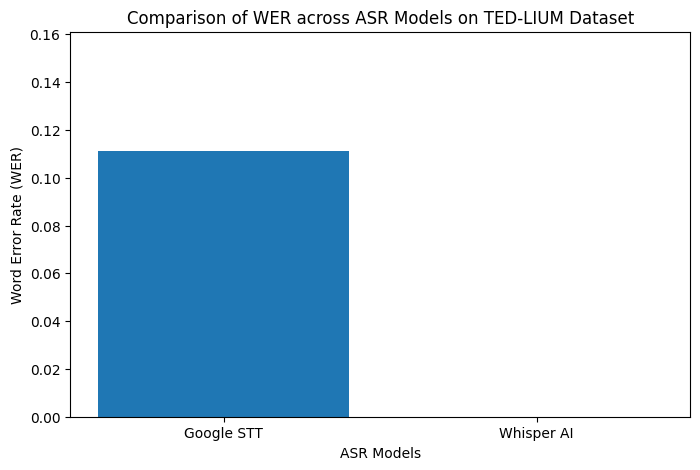

In [6]:
import matplotlib.pyplot as plt

models = ["Google STT", "Whisper AI"]
wer_scores = [wer_google, wer_whisper]

plt.figure(figsize=(8, 5))
plt.bar(models, wer_scores, color=["#1f77b4", "#2ca02c"])
plt.xlabel("ASR Models")
plt.ylabel("Word Error Rate (WER)")
plt.title("Comparison of WER across ASR Models on TED-LIUM Dataset")
plt.ylim(0, max(wer_scores) + 0.05)
plt.show()
